In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
#from __future__ import division

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data_1=pd.read_pickle('cleaned_df_3.pkl')
data_1.head()

Row                    Transaction Id  \
0  196  bf7a5b63ef96de9709f1895361fb19f1   
1  197  38fee116e6f889f4f8947e8d3223c4e9   
2  723  614e41dfdf003a358e222dd25bd3fb37   
3  758  d17966ae23e35d2fae1bbeb81a43420f   
4  801  34ee74f0538238c268ee22dea94817d8   

                        Anon Student Id                         Session Id  \
0  Stu_005a9729f8e3869ff12b105e0f7bb82e  S276199344502b5bb84fdeb28414e59df   
1  Stu_005a9729f8e3869ff12b105e0f7bb82e  S276199344502b5bb84fdeb28414e59df   
2  Stu_005a9729f8e3869ff12b105e0f7bb82e  S8b8b56ba097e11d7d5e2da54ccf54883   
3  Stu_005a9729f8e3869ff12b105e0f7bb82e  S8b8b56ba097e11d7d5e2da54ccf54883   
4  Stu_005a9729f8e3869ff12b105e0f7bb82e  S8b8b56ba097e11d7d5e2da54ccf54883   

           Time Duration (sec) Student Response Subtype  \
0  5/2/16 12:26          132.5                      NaN   
1  5/2/16 12:36            581                      NaN   
2  5/4/16 12:32          15.75                 Student2   
3  5/4/16 12:35          0.333                      NaN   
4  5/4/16 12:37             11                 Student2   

                   Level (Assignment)                  Level (ProblemSet)  \
0                Show what you know A                        Assessment_A   
1                Show what you know A                        Assessment_A   
2  Equivalent Erroneous Collaboration  Erroneous_Equivalent_Collaboration   
3  Equivalent Erroneous Collaboration  Erroneous_Equivalent_Collaboration   
4  Equivalent Erroneous Collaboration  Erroneous_Equivalent_Collaboration   

  Problem Name  ...        CF (Completion History)          CF (Team ID)  \
0            5  ...  1,1,1,1,0,0,0,0,0,0,0,0,0,0,0                   NaN   
1            6  ...  1,1,1,1,1,0,0,0,0,0,0,0,0,0,0                   NaN   
2           1a  ...                0,0,0,0,0,0,0,0  RGFyaWVuWixPbGl2aWFN   
3           2a  ...                1,0,0,0,0,0,0,0  RGFyaWVuWixPbGl2aWFN   
4           3a  ...                1,1,0,0,0,0,0,0  RGFyaWVuWixPbGl2aWFN   

  CF (Team Position)                        CF (collaborating_sessions)  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2             1 of 2  S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...   
3             1 of 2  S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...   
4             1 of 2  S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...   

   CF (step_id)         CF (tool_event_time)        CF (tutor_event_time)  \
0         236.0  2016-05-02 16:26:26.214 UTC  2016-05-02 16:26:26.260 UTC   
1         236.0  2016-05-02 16:36:09.528 UTC  2016-05-02 16:36:09.561 UTC   
2          32.0  2016-05-04 16:32:27.244 UTC  2016-05-04 16:32:27.258 UTC   
3          32.0  2016-05-04 16:35:03.999 UTC   2016-05-04 16:35:04.36 UTC   
4          32.0  2016-05-04 16:37:25.446 UTC  2016-05-04 16:37:25.457 UTC   

                                           word_list num_list symb_list  
0  [no, because, you, don't, change, the, denomin...       []        []  
1                    [i, do, not, know, the, answer]       []        []  
2  [first, you, need, to, double, the, denominato...       []        []  
3  [first, multiply, the, denominator, by, two, t...       []        []  
4  [first, multiply, 8, NUMBER, by, 2, NUMBER, th...   [8, 2]        []  

[5 rows x 33 columns]

In [3]:
data_2=pd.read_csv("textResponses_graded.csv")
data_2=data_2[['Transaction Id','correctness','answerType']]
data_2=data_2.iloc[:1450]

In [4]:
data=pd.merge(data_1,data_2,on='Transaction Id')

In [5]:
import codecs
from sklearn import feature_extraction 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
data.correctness.value_counts()

1    901
0    549
Name: correctness, dtype: int64

In [7]:
data[data.correctness==0].answerType.value_counts()

p    229
n    143
u     75
v     68
c     33
Name: answerType, dtype: int64

In [8]:
data[data.correctness==1].answerType.value_counts()

p     659
c     234
v       6
c       1
Name: answerType, dtype: int64

In [9]:
data.word_list[314]

['15/21',
 'FRACTION',
 'be',
 'bigger',
 'because',
 '15/21',
 'FRACTION',
 'be',
 'bigger',
 'section',
 'than',
 'FRACTION',
 'be',
 'split',
 'into',
 'smaller',
 'section']

In [10]:
data['new_answer']=''
all_answer=[]
for i in range(len(data)):
    for temp_word in data.word_list[i]:
        data.new_answer[i]=data.new_answer[i]+temp_word+' '
    all_answer=all_answer+[data.new_answer[i]]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
data.new_answer[0]

"no because you don't change the denominator so the why the answer be wrong "

In [12]:
all_answer[:10]

["no because you don't change the denominator so the why the answer be wrong ",
 'i do not know the answer ',
 'next time lester need to know the the smaller the fraction the greater it be ',
 'i do not know ',
 "i don't know ",
 'i think she be right because i double check her answer ',
 'in 15/24 FRACTION there be more space to fill up but in 15/21 FRACTION there be less to fill up ',
 'i think her answer be right ',
 'would you want to have 32/65 FRACTION of something or 32/45 FRACTION ',
 'i think the the picture be not correct i think the because you never add the denominator the correct answer would be FRACTION ']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_answer)

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )   

(1450, 378)


In [14]:
tfidf

<1450x378 sparse matrix of type '<class 'numpy.float64'>'
	with 18369 stored elements in Compressed Sparse Row format>

In [15]:
data['Student Response Subtype']=data['Student Response Subtype'].fillna('individual')
data['Student Response Subtype'].value_counts()

individual    1449
Student1         1
Name: Student Response Subtype, dtype: int64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words='english', ngram_range=(1,1))
tfidf_vectorizer=TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(all_answer)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [17]:
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]
'''

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=8).fit(tfidf)\nkm_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))\ndata['km_cluster']=0\nfor i in range(len(data)):\n    data['km_cluster'][i]=km_predict[i]\n"

# 2 clusters (with correctness)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
km_predict

array([1, 1, 1, ..., 0, 1, 0])

In [19]:
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
for i in range(2):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['answerType'].value_counts()/len(data[data['km_cluster']==i]['answerType'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
p     0.563291
c     0.369198
n     0.031646
u     0.027426
v     0.006329
c     0.002110
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 1
p    0.636270
n    0.131148
c    0.094262
v    0.072746
u    0.063525
Name: answerType, dtype: float64
-----------------------------------------


In [21]:
for i in range(2):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['correctness'].value_counts()/len(data[data['km_cluster']==i]['correctness'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
1    0.71308
0    0.28692
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 1
1    0.576844
0    0.423156
Name: correctness, dtype: float64
-----------------------------------------


In [22]:
from sklearn.cluster import SpectralClustering
sp_cluster = SpectralClustering(n_clusters=2, gamma=0.1).fit_predict(tfidf)
sp_cluster

array([0, 0, 0, ..., 1, 0, 1])

In [23]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(2):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['answerType'].value_counts()/len(data[data['sp_cluster']==i]['answerType'])
    print(temp_stat)
    print('-----------------------------------------')

For Spectral Cluster 0
p    0.632990
n    0.131959
c    0.096907
v    0.072165
u    0.063918
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 1
p     0.570833
c     0.360417
n     0.031250
u     0.027083
v     0.008333
c     0.002083
Name: answerType, dtype: float64
-----------------------------------------


D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(2):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['correctness'].value_counts()/len(data[data['sp_cluster']==i]['correctness'])
    print(temp_stat)
    print('-----------------------------------------')

For Spectral Cluster 0
1    0.580412
0    0.419588
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 1
1    0.704167
0    0.295833
Name: correctness, dtype: float64
-----------------------------------------


D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
data['km_cluster'].value_counts()

1    976
0    474
Name: km_cluster, dtype: int64

In [26]:
data['sp_cluster'].value_counts()

0    970
1    480
Name: sp_cluster, dtype: int64

In [27]:
data['answerType'].value_counts()

p     888
c     267
n     143
u      75
v      74
c       1
Name: answerType, dtype: int64

In [28]:
data['correctness'].value_counts()

1    901
0    549
Name: correctness, dtype: int64

In [29]:
from scipy import stats
from scipy.stats import ttest_ind

In [30]:
ttest_ind(data['km_cluster'].value_counts().values,data['answerType'].value_counts().values)

Ttest_indResult(statistic=1.7754163027019456, pvalue=0.12617463327436937)

In [31]:
ttest_ind(data['km_cluster'].value_counts().values,data['correctness'].value_counts().values)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [32]:
ttest_ind(data['sp_cluster'].value_counts().values,data['answerType'].value_counts().values)

Ttest_indResult(statistic=1.7833799707136437, pvalue=0.12479139246402485)

In [33]:
ttest_ind(data['sp_cluster'].value_counts().values,data['correctness'].value_counts().values)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [34]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['km_cluster']), list(data['answerType']), beta=1.0)

(0.11599022362870988, 0.06321972196286132, 0.0818355216169658)

In [35]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['correctness'], beta=1.0)

(0.014041874073949061, 0.013376682909627536, 0.013701209517090678)

In [36]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['sp_cluster']), list(data['answerType']), beta=1.0)

(0.10919468751997126, 0.059793663217314136, 0.07727337822048383)

In [37]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['correctness'], beta=1.0)

(0.01157251434141791, 0.011075760126381104, 0.01131868947339776)

In [38]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=10)
db_predict=db.fit(tfidf_vectorizer.transform(all_answer))
db_label=db_predict.labels_
db_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#pca=PCA(n_components=3, copy=True, whiten=True, tol=1e-5)
iso=Isomap(n_components=3, )#n_neighbors=5)
iso_predict=iso.fit_transform(tfidf)

In [40]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=None)
svd_predict = svd.fit_transform(tfidf)
svd_predict

array([[ 0.36089252, -0.29145185,  0.02416244],
       [ 0.16884962, -0.1842306 , -0.05436825],
       [ 0.30981456, -0.1316601 ,  0.16465756],
       ...,
       [ 0.57076098,  0.13674505,  0.35446653],
       [ 0.26070727, -0.1530601 , -0.0806508 ],
       [ 0.55002635,  0.1373846 ,  0.26187943]])

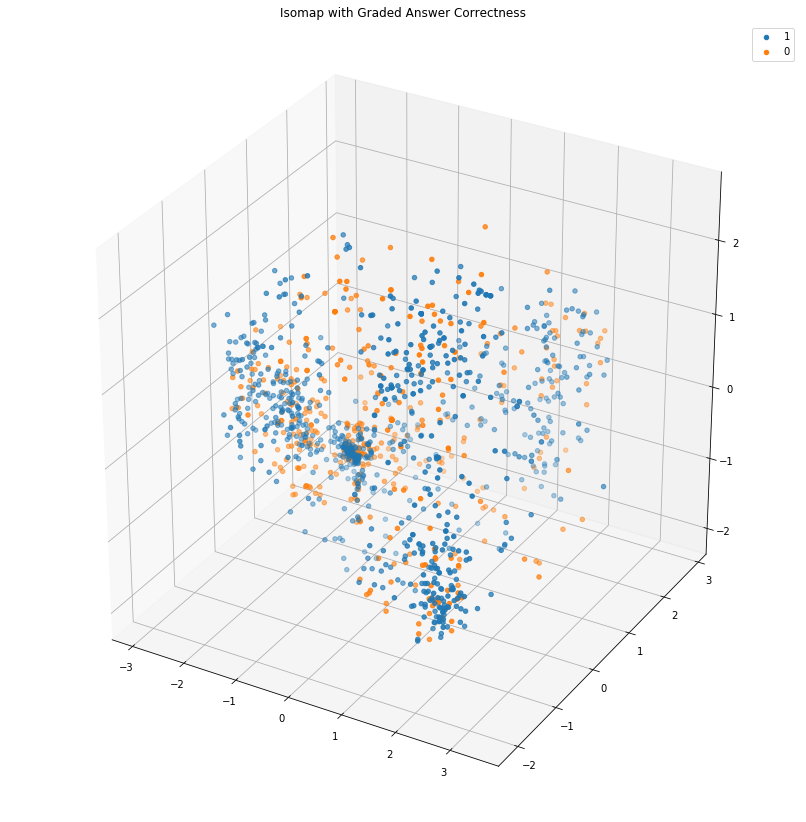

In [41]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['correctness'].value_counts().index:
    mask = data['correctness'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Graded Answer Correctness')
plt.show()

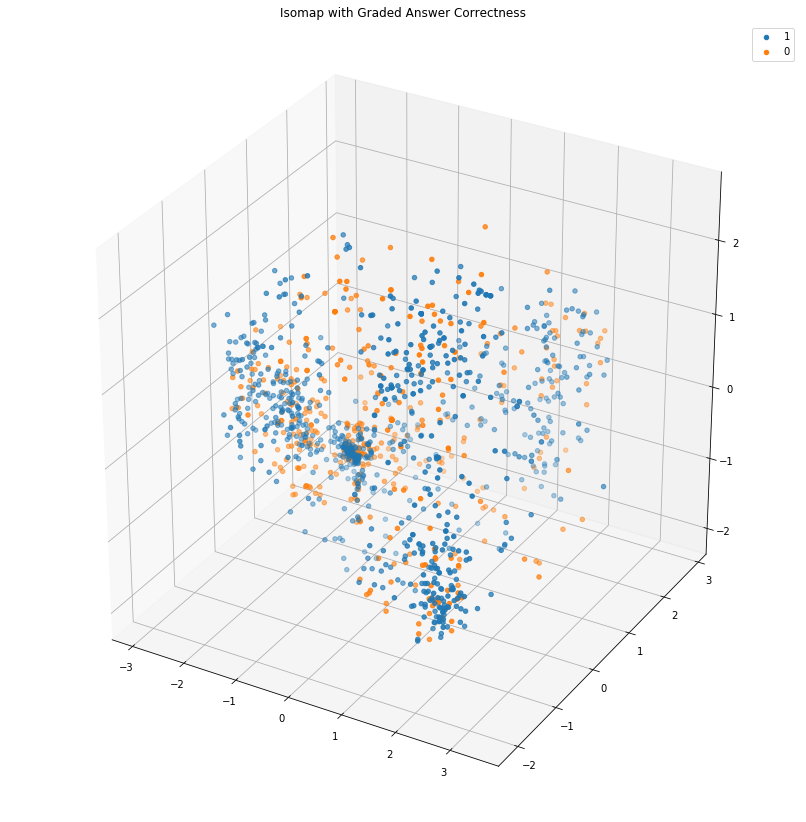

In [42]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['correctness'].value_counts().index:
    mask = data['correctness'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Graded Answer Correctness')
plt.show()

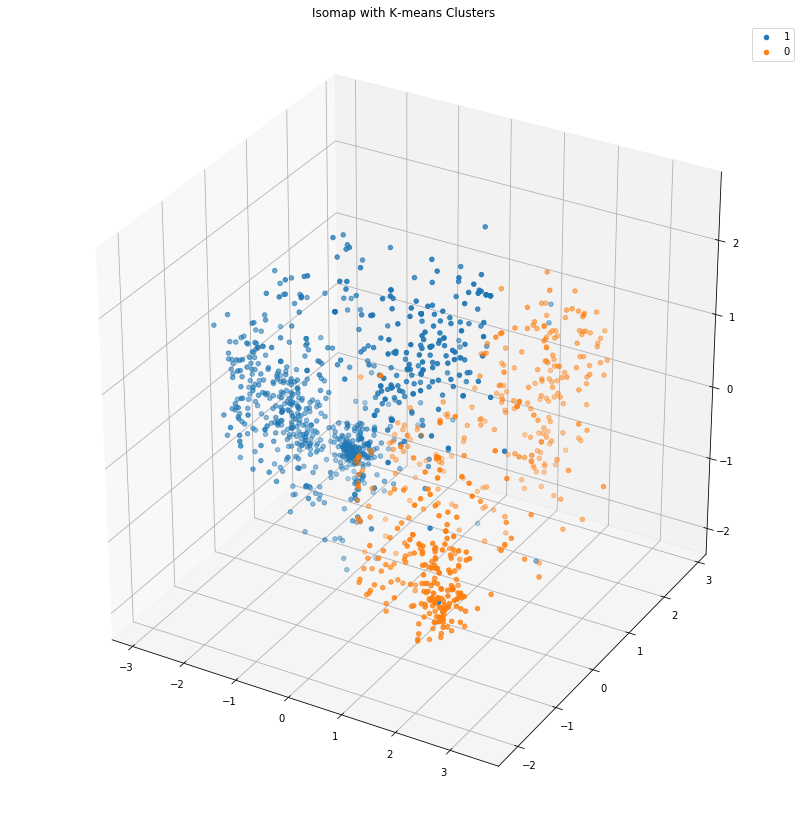

In [43]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with K-means Clusters')
plt.show()

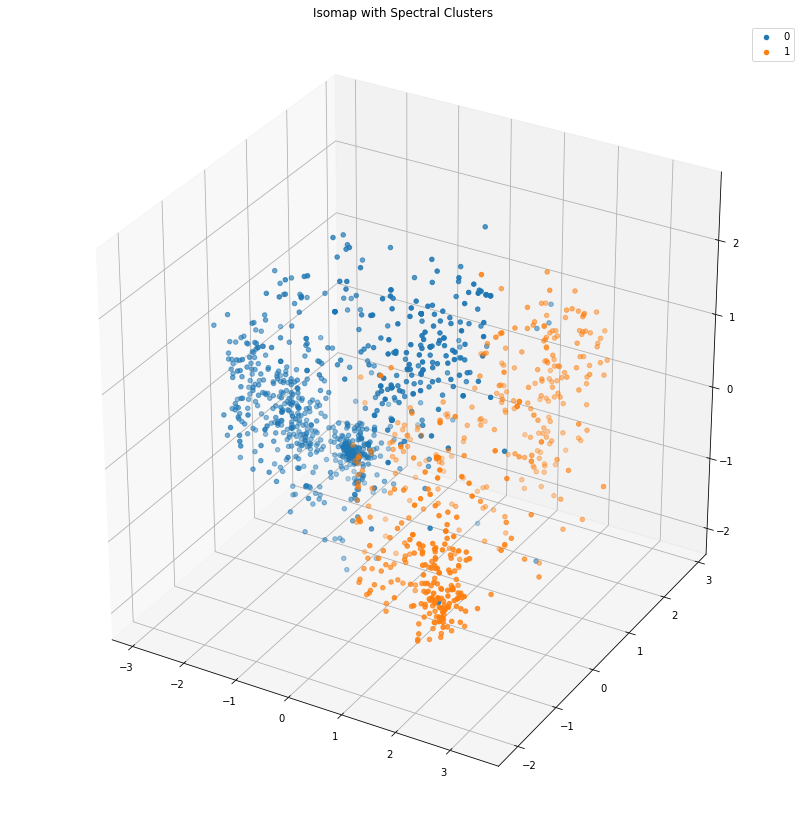

In [44]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

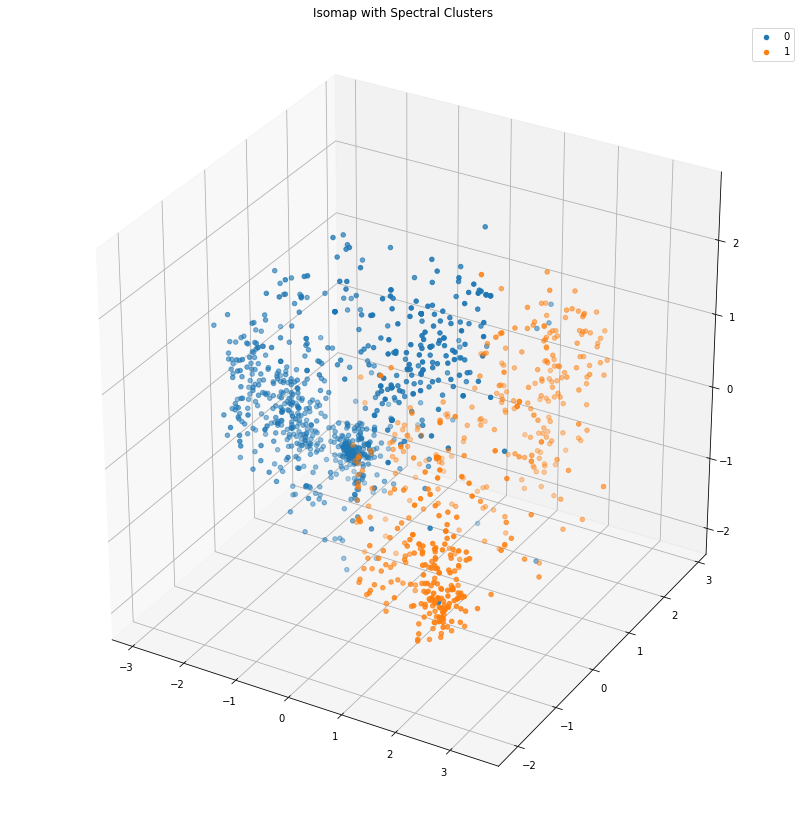

In [45]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

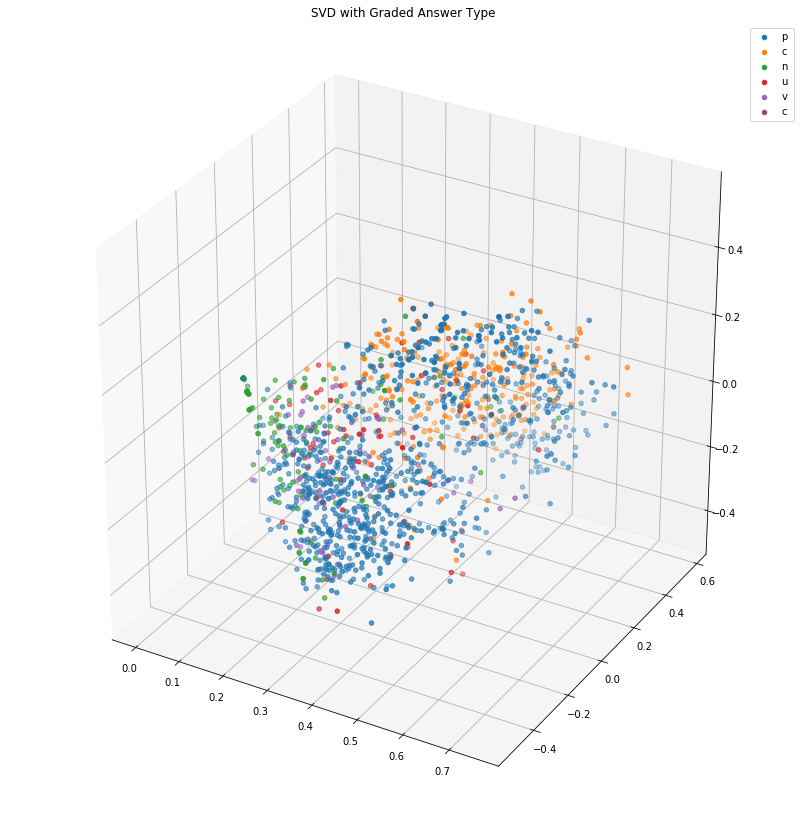

In [46]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['answerType'].value_counts().index:
    mask = data['answerType'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Graded Answer Type')
plt.show()

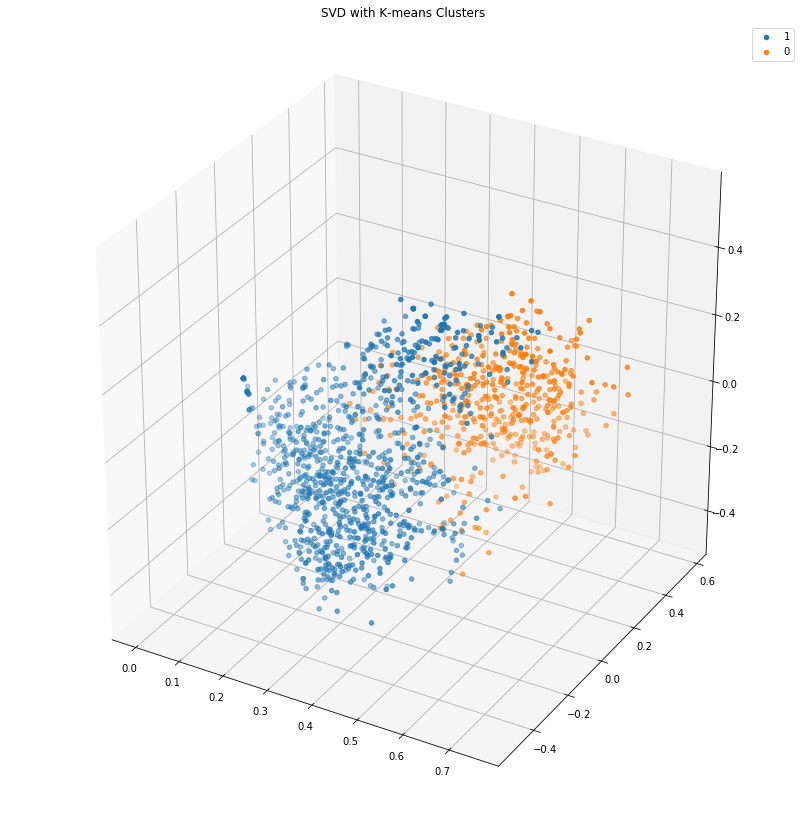

In [47]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with K-means Clusters')
plt.show()

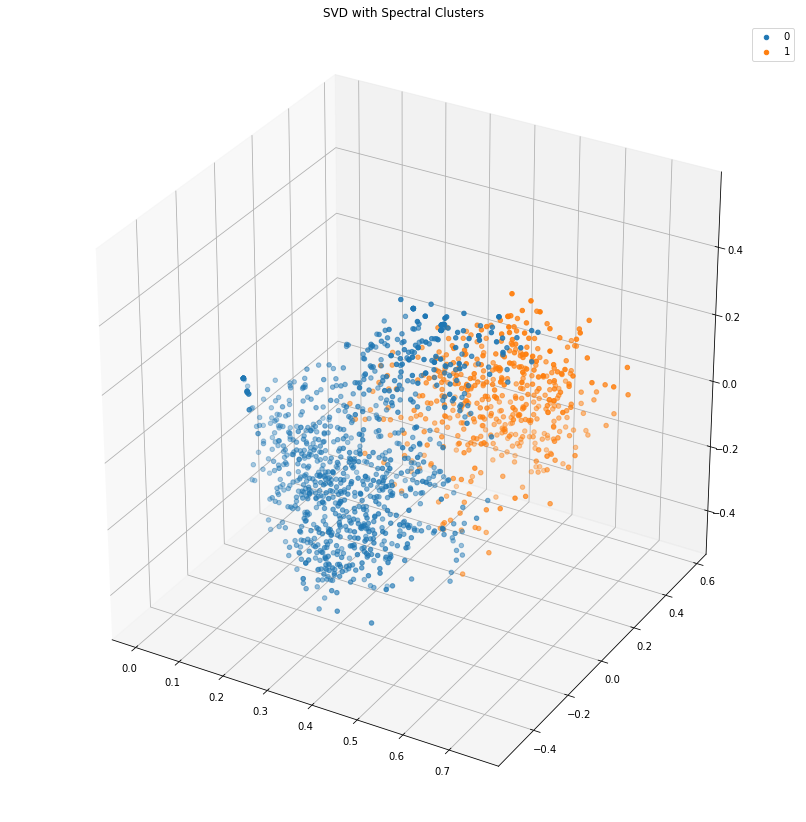

In [48]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Spectral Clusters')
plt.show()

# 5 clusters (with answer type)

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
km_predict

array([1, 4, 3, ..., 0, 4, 2])

In [50]:
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
for i in range(5):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['answerType'].value_counts()/len(data[data['km_cluster']==i]['answerType'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
p    0.552381
c    0.390476
n    0.033333
u    0.023810
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 1
p    0.876751
n    0.039216
u    0.039216
c    0.022409
v    0.019608
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 2
p     0.560748
c     0.373832
n     0.032710
u     0.028037
c     0.004673
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 3
p    0.665072
c    0.258373
u    0.047847
n    0.023923
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 4
p    0.434783
n    0.239130
v    0.145652
c    0.093478
u    0.086957
Name: answerType, dtype: float64
-----------------------------------------


In [52]:
for i in range(5):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['correctness'].value_counts()/len(data[data['km_cluster']==i]['correctness'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
1    0.742857
0    0.257143
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 1
1    0.80112
0    0.19888
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 2
1    0.719626
0    0.280374
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 3
1    0.779904
0    0.220096
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 4
0    0.691304
1    0.308696
Name: correctness, dtype: float64
-----------------------------------------


In [53]:
from sklearn.cluster import SpectralClustering
sp_cluster = SpectralClustering(n_clusters=5, gamma=0.1).fit_predict(tfidf)
sp_cluster

array([4, 4, 1, ..., 0, 4, 3])

In [54]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(5):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['answerType'].value_counts()/len(data[data['sp_cluster']==i]['answerType'])
    print(temp_stat)
    print('-----------------------------------------')

For Spectral Cluster 0
p    0.488
c    0.464
u    0.024
n    0.024
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 1
p    0.695238
c    0.223810
u    0.047619
n    0.023810
v    0.004762
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 2
p     0.662602
c     0.247967
n     0.036585
u     0.032520
v     0.016260
c     0.004065
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 3
p    0.500000
c    0.429577
u    0.042254
n    0.028169
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 4
p    0.614856
n    0.167813
v    0.094911
u    0.066025
c    0.055021
Name: answerType, dtype: float64
-----------------------------------------


D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(5):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['correctness'].value_counts()/len(data[data['sp_cluster']==i]['correctness'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
1    0.744
0    0.256
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 1
1    0.780952
0    0.219048
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 2
1    0.654472
0    0.345528
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 3
1    0.690141
0    0.309859
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 4
1    0.529574
0    0.470426
Name: correctness, dtype: float64
-----------------------------------------


In [56]:
data['km_cluster'].value_counts()

4    460
1    357
2    214
0    210
3    209
Name: km_cluster, dtype: int64

In [57]:
data['sp_cluster'].value_counts()

4    727
2    246
1    210
3    142
0    125
Name: sp_cluster, dtype: int64

In [58]:
data['answerType'].value_counts()

p     888
c     267
n     143
u      75
v      74
c       1
Name: answerType, dtype: int64

In [59]:
data['correctness'].value_counts()

1    901
0    549
Name: correctness, dtype: int64

In [60]:
from scipy import stats
from scipy.stats import ttest_ind

In [61]:
ttest_ind(data['km_cluster'].value_counts().values,data['answerType'].value_counts().values)

Ttest_indResult(statistic=0.31282555864645084, pvalue=0.7615405566305666)

In [62]:
ttest_ind(data['km_cluster'].value_counts().values,data['correctness'].value_counts().values)

Ttest_indResult(statistic=-3.4421063922015382, pvalue=0.018393523427515723)

In [63]:
ttest_ind(data['sp_cluster'].value_counts().values,data['answerType'].value_counts().values)

Ttest_indResult(statistic=0.27120809582529987, pvalue=0.7923488913075682)

In [64]:
ttest_ind(data['sp_cluster'].value_counts().values,data['correctness'].value_counts().values)

Ttest_indResult(statistic=-2.0867680419844636, pvalue=0.09127373298414534)

In [65]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['km_cluster']), list(data['answerType']), beta=1.0)

(0.11626140037922732, 0.15549266366212433, 0.13304525832816208)

In [66]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['correctness'], beta=1.0)

(0.06345877442769352, 0.1483399732958454, 0.08889073240677085)

In [67]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['sp_cluster']), list(data['answerType']), beta=1.0)

(0.08648360993851739, 0.10187303664361529, 0.09354963707635314)

In [68]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['correctness'], beta=1.0)

(0.015797455721436524, 0.032524059872899684, 0.021265781480732597)

In [69]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=10)
db_predict=db.fit(tfidf_vectorizer.transform(all_answer))
db_label=db_predict.labels_
db_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#pca=PCA(n_components=3, copy=True, whiten=True, tol=1e-5)
iso=Isomap(n_components=3, )#n_neighbors=5)
iso_predict=iso.fit_transform(tfidf)

In [71]:
iso_predict

array([[-2.39412546, -0.31037468,  0.9055044 ],
       [-0.68306776,  0.17785714, -0.52442969],
       [-0.68219439,  0.1773661 , -0.52283965],
       ...,
       [ 2.60446858, -1.42332831,  0.43252377],
       [-0.68219439,  0.1773661 , -0.52283965],
       [ 1.66309247,  1.31860427,  1.49291165]])

In [72]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=None)
svd_predict = svd.fit_transform(tfidf)
svd_predict

array([[ 0.36089252, -0.29145185,  0.02416219],
       [ 0.16884962, -0.1842306 , -0.05436707],
       [ 0.30981456, -0.1316601 ,  0.1646585 ],
       ...,
       [ 0.57076098,  0.13674505,  0.35446806],
       [ 0.26070727, -0.1530601 , -0.08065102],
       [ 0.55002635,  0.1373846 ,  0.26187741]])

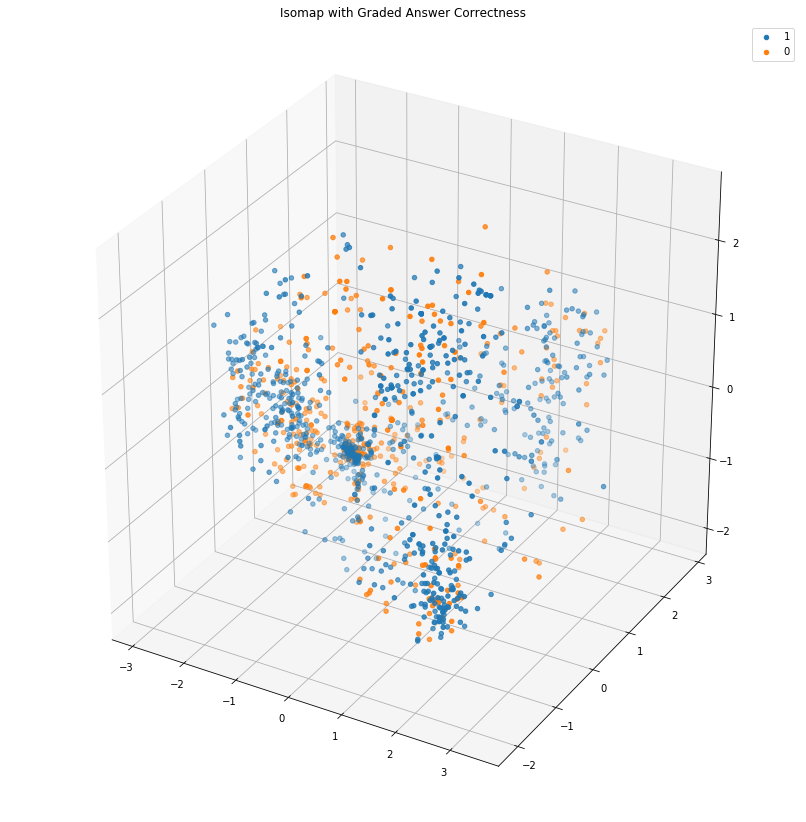

In [73]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['correctness'].value_counts().index:
    mask = data['correctness'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Graded Answer Correctness')
plt.show()

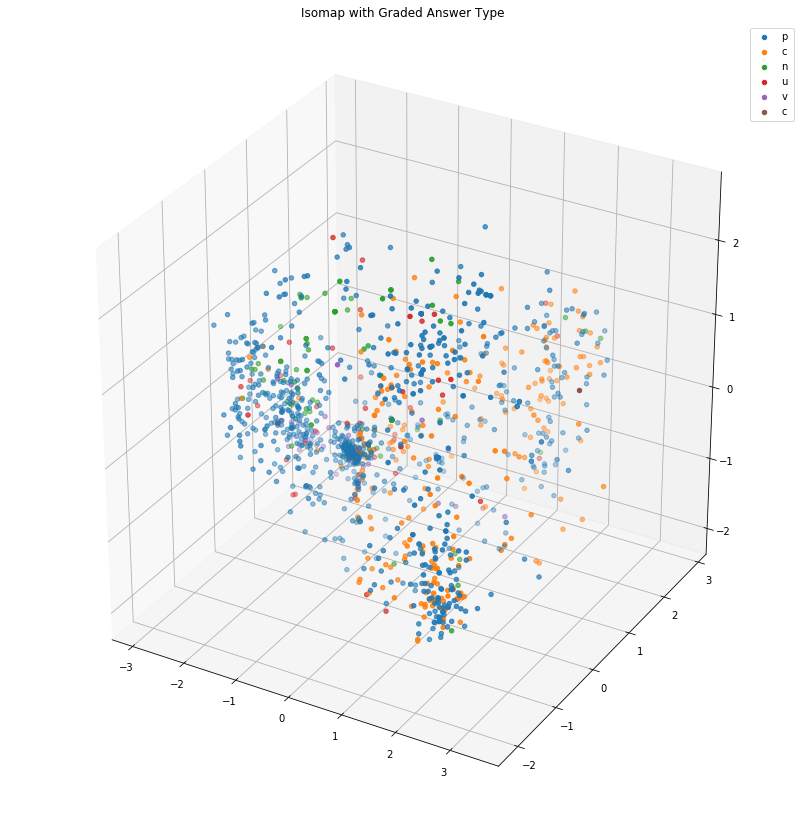

In [74]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['answerType'].value_counts().index:
    mask = data['answerType'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Graded Answer Type')
plt.show()

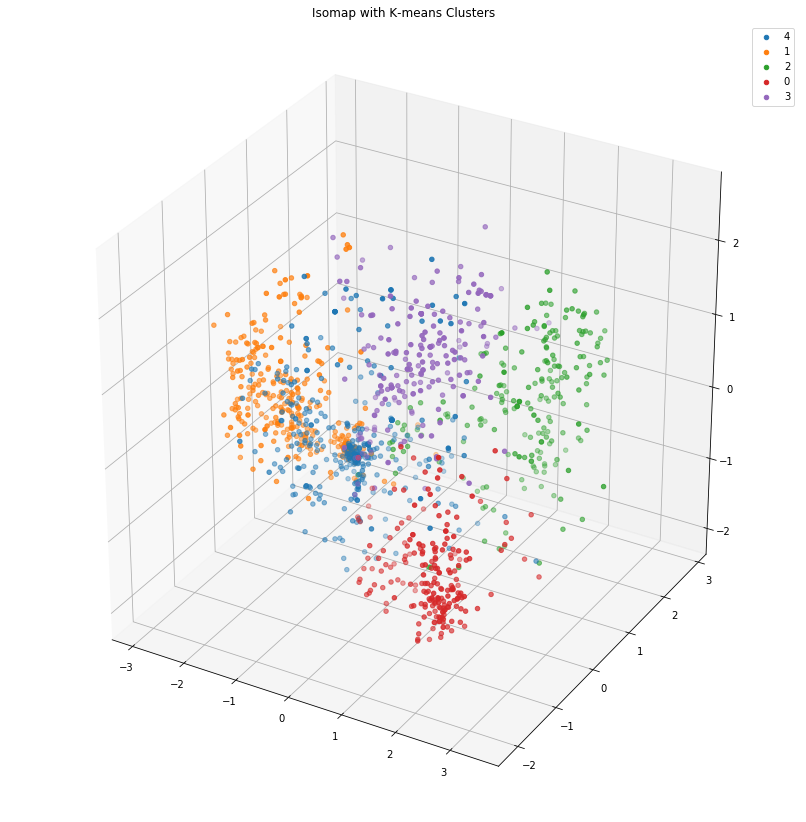

In [75]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with K-means Clusters')
plt.show()

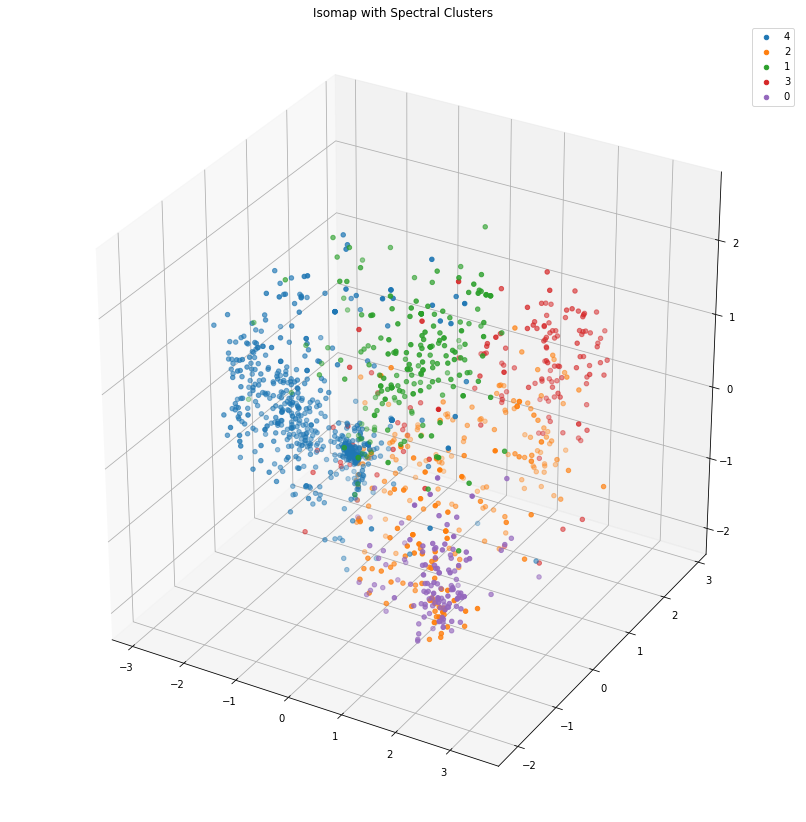

In [76]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

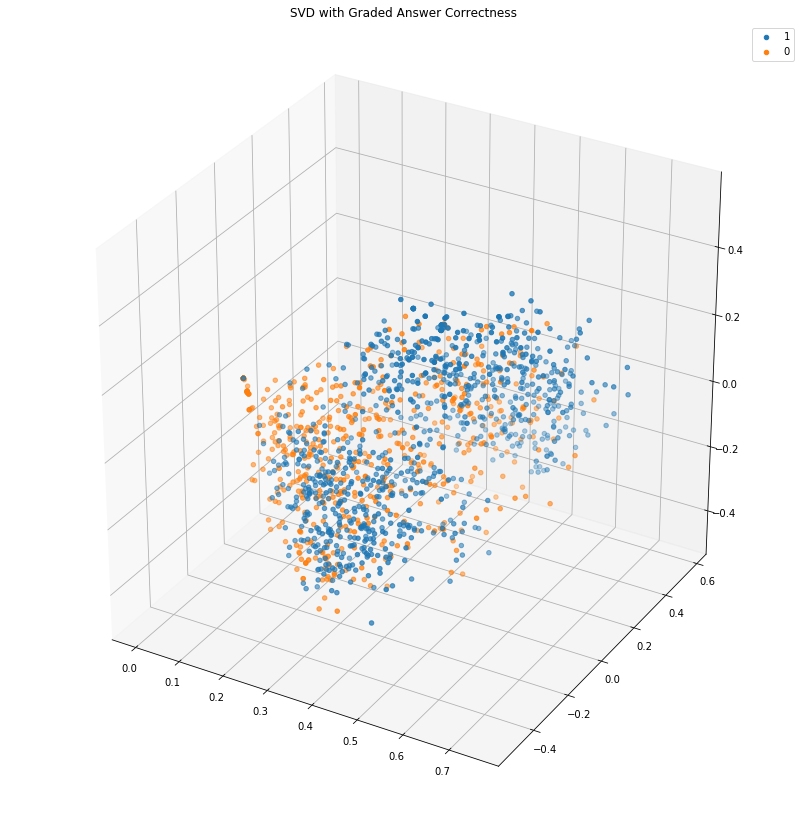

In [77]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['correctness'].value_counts().index:
    mask = data['correctness'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Graded Answer Correctness')
plt.show()

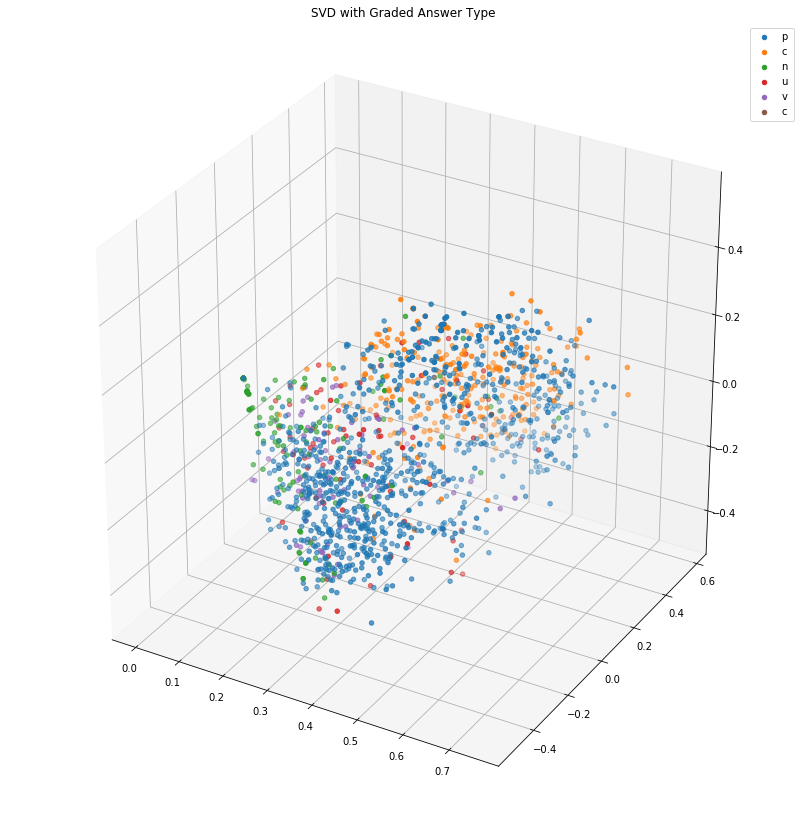

In [78]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['answerType'].value_counts().index:
    mask = data['answerType'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Graded Answer Type')
plt.show()

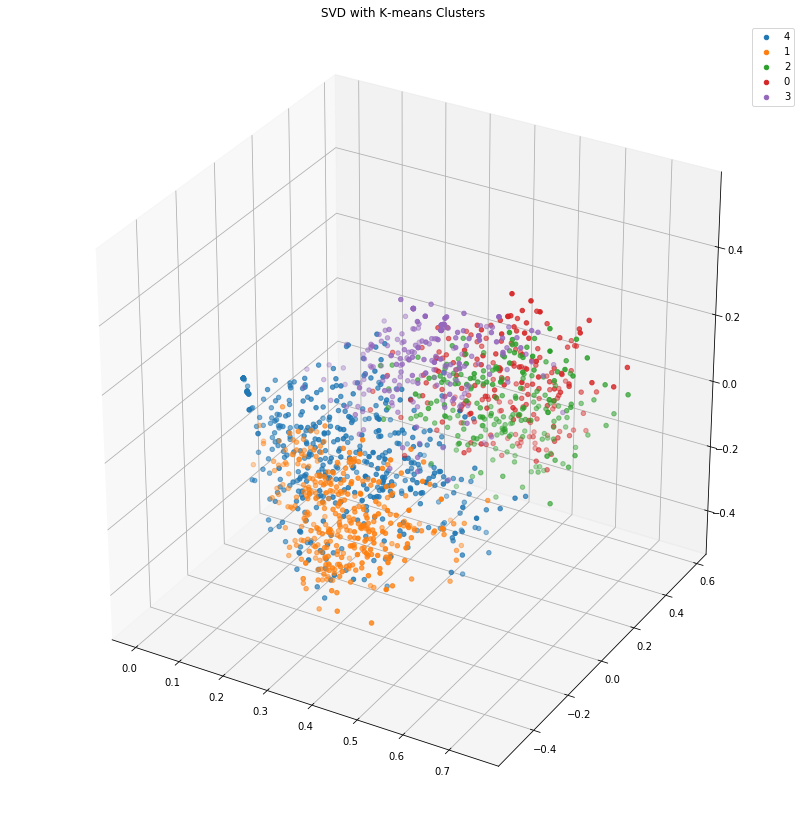

In [79]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with K-means Clusters')
plt.show()

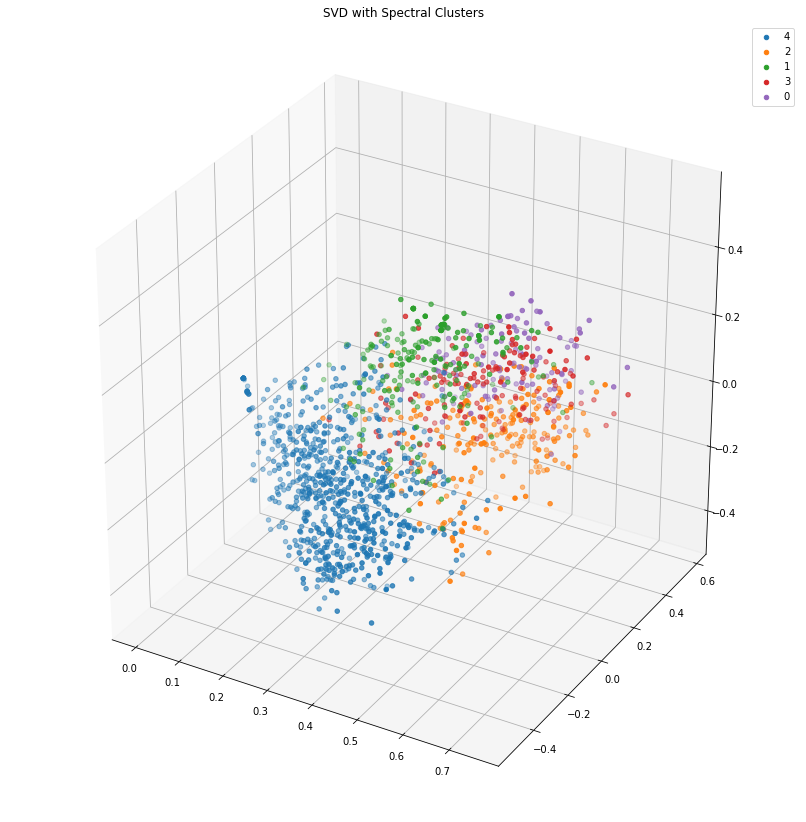

In [80]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Spectral Clusters')
plt.show()